#  Convolutional Neural Networks


*Admission No: 121777*

*Name: Simala Leonard*

# Goals
This activity focuses on learning how to use a new architecture that has been extremely successful classifying images. The students must learn:

*   Implement Convolutional Neural Netwoks
*   Train and evaluate models
*   Fine tune hyperparameters
*   Classify with the model trained
*   Saving and restoring models



In [1]:
# Load the modules needed
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt


*Define dataset path*

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:25<00:00, 96.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [3]:
import os

basepath = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"
print("Contents of basepath:", os.listdir(basepath))


Contents of basepath: ['chest_xray']


In [ ]:
basepath = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"
print("Contents of chest_xray folder:", os.listdir(basepath))


Contents of chest_xray folder: ['train', 'test', '__MACOSX', 'chest_xray', 'val']


In [ ]:
# Define classes and check paths
classes = ["NORMAL", "PNEUMONIA"]
images = {}

# Iterate over classes and count images
for c in classes:
    folder_path = os.path.join(basepath, "train", c)
    if os.path.exists(folder_path):
        images[c] = os.listdir(folder_path)
        print(f"Number of training images in the class {c}: {len(images[c])}")
    else:
        print(f"Folder for class {c} does not exist at {folder_path}")

Number of training images in the class NORMAL: 1341
Number of training images in the class PNEUMONIA: 3875


*Show some example images with the associate category*

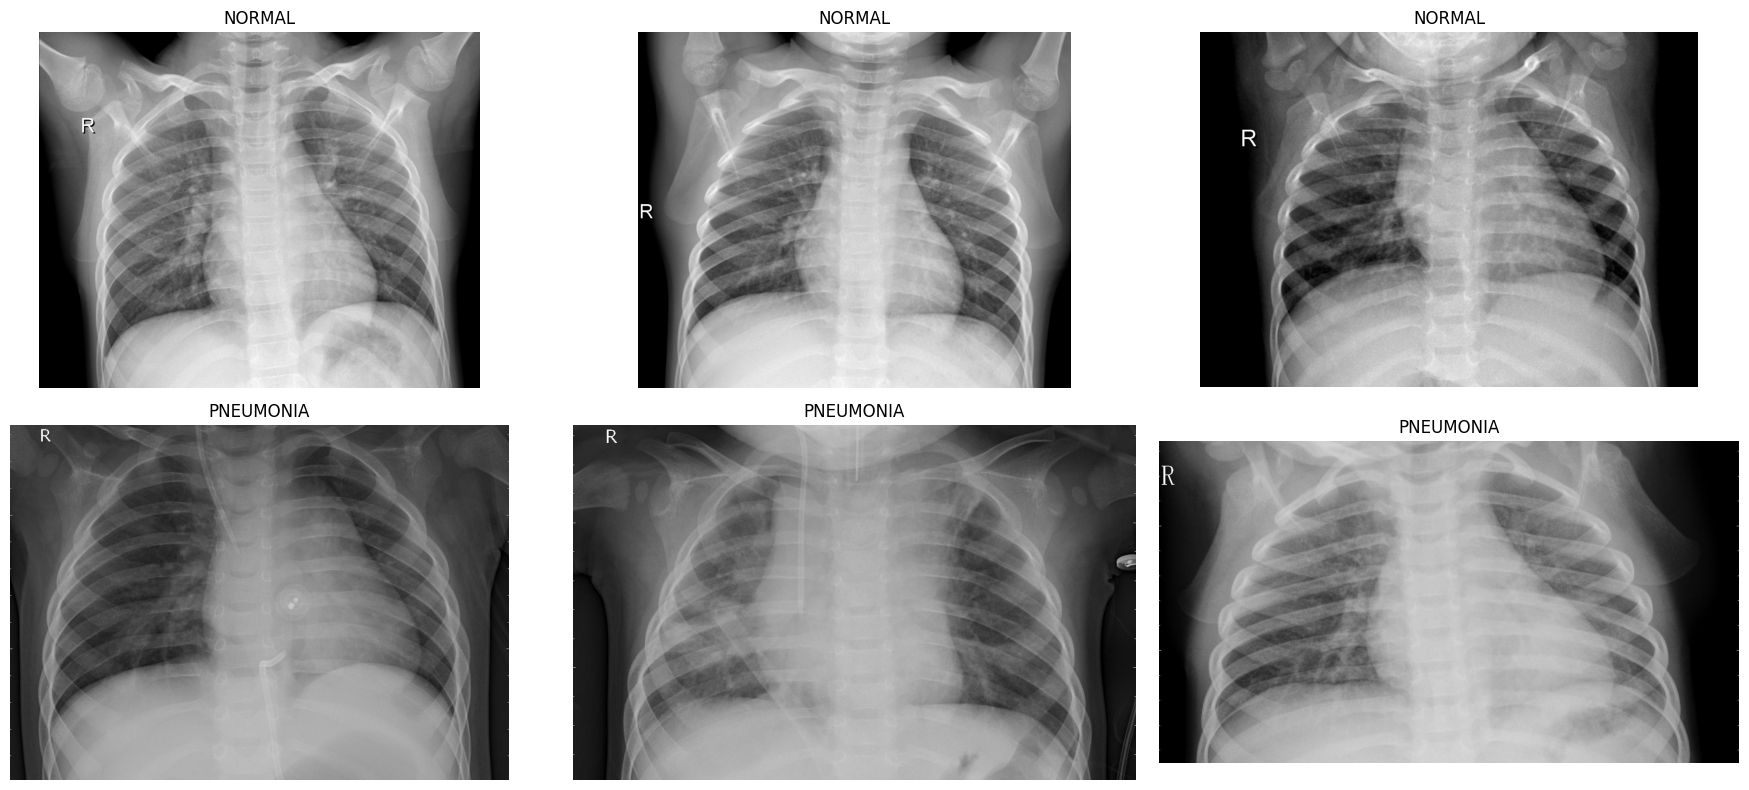

In [ ]:
fig, ax = plt.subplots(nrows=len(classes), ncols=3, figsize=(18, 8))  # 3 examples per class

for i, c in enumerate(classes):
    for j in range(3):  # Show 3 images per class
        idx = np.random.randint(len(images[c]))
        img_path = os.path.join(basepath, "train", c, images[c][idx])
        img = load_img(img_path, color_mode="grayscale")
        ax[i, j].imshow(img, cmap="gray")
        ax[i, j].set_title(f"{c}")
        ax[i, j].axis("off")

plt.tight_layout()
plt.show()


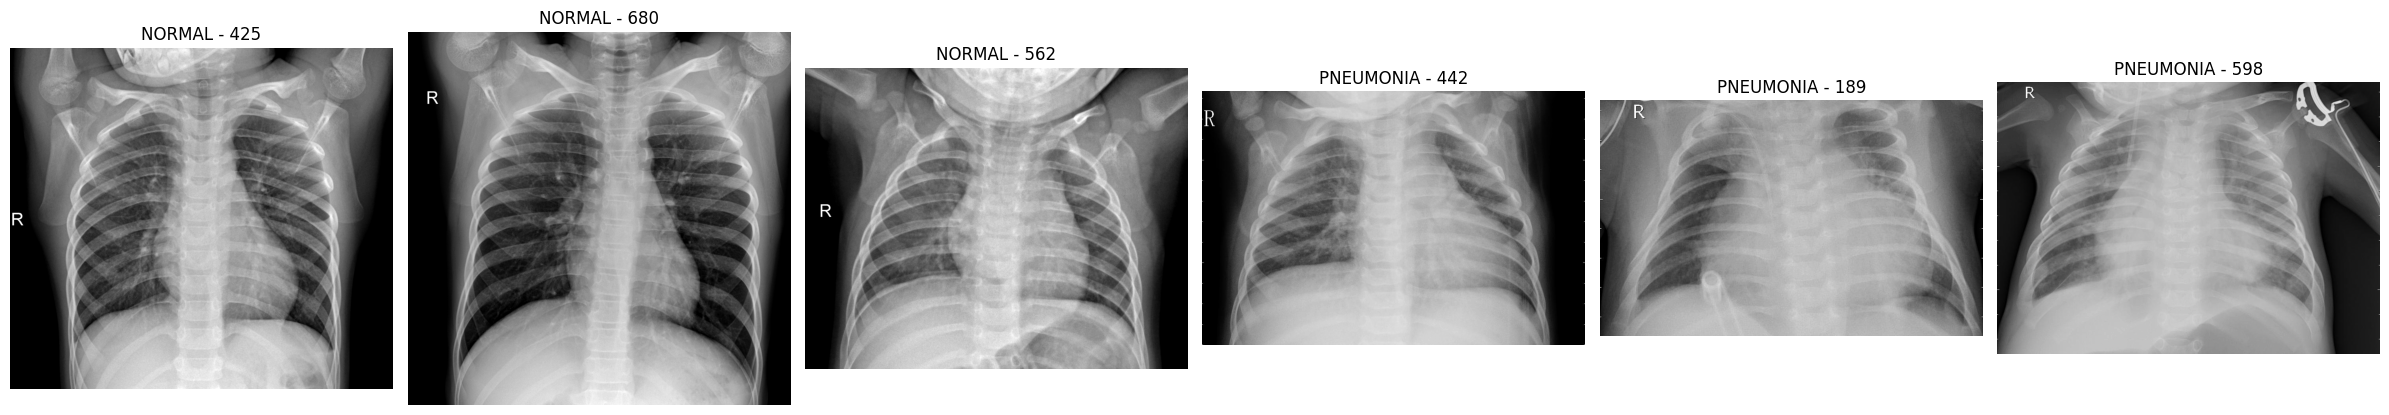

In [ ]:
# Ensure random selection between 0 and 999, but valid for smaller datasets
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(24, 8))

for i, c in enumerate(classes):
    # Determine the upper limit for random index
    max_index = min(999, len(images[c]) - 1)  # Use 999 or the last valid index
    for j in range(3):  # Show 3 random images for each class
        random_index = np.random.randint(0, max_index + 1)
        img_path = os.path.join(basepath, "train", c, images[c][random_index])
        img = load_img(img_path, color_mode="grayscale")

        # Plot the images
        ax[j + i * 3].imshow(img, cmap="gray")  # Arrange images in 6 subplots
        ax[j + i * 3].set_title(f"{c} - {random_index}")
        ax[j + i * 3].axis("off")

plt.tight_layout()
plt.show()


**1. Summary of the Training Set**
- Objective: Analyze the dataset.
- Implementation:
      * Count the total number of images for each class in the training, validation, and test sets.
      * Display a few sample images with their labels.

In [ ]:
# Summary of the training set
for split in ['train', 'val', 'test']:
    print(f"Summary for {split} set:")
    for c in classes:
        folder_path = os.path.join(basepath, split, c)
        if os.path.exists(folder_path):
            print(f"Class {c}: {len(os.listdir(folder_path))} images")


Summary for train set:
Class NORMAL: 1341 images
Class PNEUMONIA: 3875 images
Summary for val set:
Class NORMAL: 8 images
Class PNEUMONIA: 8 images
Summary for test set:
Class NORMAL: 234 images
Class PNEUMONIA: 390 images


**3. Create a Model with Different Architectures**
- Objective: Experiment with various CNN architectures.
- Implementation:
       * Use TensorFlow/Keras to create models.
       * Try architectures with different numbers of convolutional layers, filters, and pooling layers.

In [ ]:
# Define the processes to read the images
batch_size = 32
datagen_train = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
training_set = datagen_train.flow_from_directory (os.path.join( basepath ,"train"),
                target_size =(150,150 ),
                color_mode ="grayscale",
                batch_size = batch_size,
                class_mode="binary"
                )
datagen_test = ImageDataGenerator( rescale =1./255 )
test_set = datagen_test.flow_from_directory (os.path.join (basepath, "test"),
                target_size =( 150 , 150 ),
                color_mode ="grayscale",
                batch_size = batch_size,
                class_mode="binary"
                )

datagen_val = ImageDataGenerator( rescale =1./255 )
val_set = datagen_val.flow_from_directory (os.path.join (basepath, "val"),
                target_size =( 150 , 150 ),
                color_mode ="grayscale",
                batch_size = batch_size,
                class_mode="binary"
                )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


- The dataset has:
                   * 5216 images for training
                   * 624 images for testing
                   * 16 images for validation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4. Train Different Models and Evaluate**
- Objective: Train models and compare their performance.
- Implementation:
        * Split the data into training and validation sets.
        * Train the model and evaluate it on the validation set.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    callbacks=[
        ModelCheckpoint('best_model.keras', save_best_only=True),
        EarlyStopping(patience=3)
    ]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.8028 - loss: 0.4847 - val_accuracy: 0.7324 - val_loss: 1.0048
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9585 - loss: 0.1154 - val_accuracy: 0.7628 - val_loss: 0.9603
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.9581 - loss: 0.1094 - val_accuracy: 0.7356 - val_loss: 1.2635
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.9713 - loss: 0.0853 - val_accuracy: 0.7548 - val_loss: 0.8183
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9718 - loss: 0.0818 - val_accuracy: 0.7212 - val_loss: 1.4290
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.9662 - loss: 0.0815 - val_accuracy: 0.7468 - val_loss: 1.2700
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.9749 - loss: 0.0690 - val_accuracy: 0.7436 - val_loss: 1.4181


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 456ms/step - accuracy: 0.7502 - loss: 1.2232
Test Loss: 1.4181
Test Accuracy: 0.7436


5. Specify Training Parameters
- Document the following for each model:

                  * Cost function: binary_crossentropy.
                  * Optimizer: adam.
                  * Metrics: accuracy.
                  * Hyperparameters: Learning rate (default in Adam), batch size (32), epochs (10).

6. Show Misclassified Images
Identify images the model misclassified and display them

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


<ipython-input-16-a0bfa22c8ee0>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {int(test_labels[i])}, Predicted: {int(predictions[i] > 0.5)}")


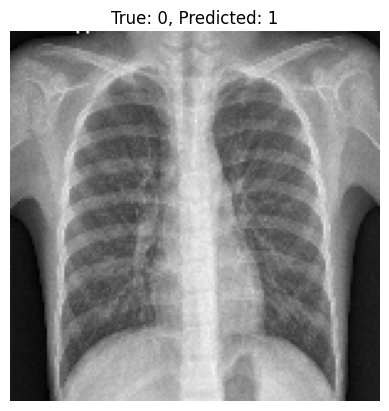

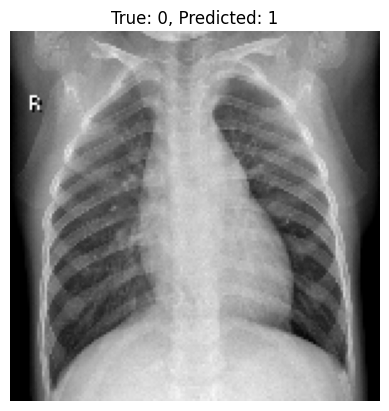

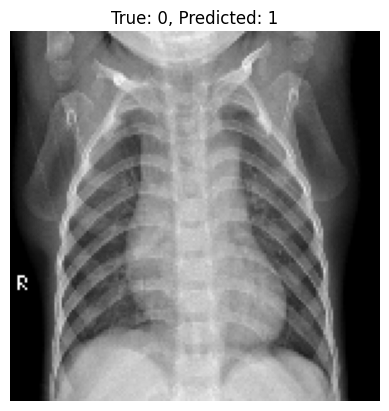

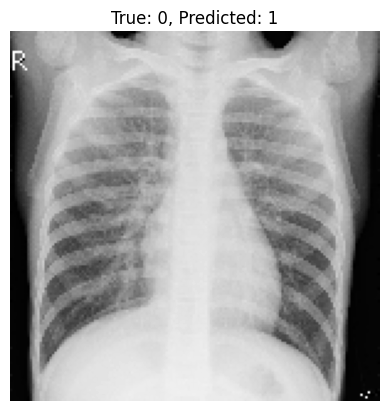

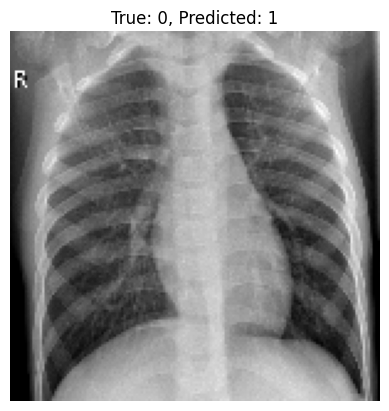

In [ ]:
# Find misclassified images
test_images, test_labels = next(iter(test_set))
predictions = model.predict(test_images)
misclassified_indices = np.where((predictions > 0.5).astype(int).flatten() != test_labels.astype(int))[0]

# Display misclassified images
for i in misclassified_indices[:5]:  # Show first 5
    plt.imshow(test_images[i].reshape(150, 150), cmap='gray')
    plt.title(f"True: {int(test_labels[i])}, Predicted: {int(predictions[i] > 0.5)}")
    plt.axis("off")
    plt.show()


7. Hypothesis of what made the CNN classify wrongly those images

#### **1. Model Overfitting or Underfitting**
  - **Overfitting**: The model memorizes training data but fails to generalize to new data, leading to poor performance on the test set.
  - **Underfitting**: The model is too simple (e.g., insufficient layers or neurons) and cannot capture the complexity of the data.
- **Impact**:
  - Overfitting may occur if the training accuracy is high but validation accuracy is low.
  - Underfitting may occur if both training and validation accuracies are low.

#### **2. Poor Image Quality**
- **Explanation**: Images that are blurry, low contrast, or poorly lit can obscure key features, making it difficult for the model to learn or correctly identify patterns.
- **Impact**:
  - Blurry chest X-rays may hide lung abnormalities
  - Low contrast images might make distinctions between "NORMAL" and "PNEUMONIA" less visible.

---

#### **3. Overlapping Features Between Classes**
- **Explanation**: The model might struggle if the features of one class (e.g., NORMAL) overlap with those of another (e.g., PNEUMONIA). For instance:
  - Early signs of pneumonia could appear similar to a normal X-ray, leading to confusion.
  - Variations in the dataset, such as artifacts (e.g., medical device shadows), could mislead the model.

---



In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the model creation function
def create_model(optimizer='adam', filters=32, dropout_rate=0.5):
    model = Sequential([
        Conv2D(filters, (3, 3), activation='relu', input_shape=(150, 150, 1)),
        MaxPooling2D(2, 2),
        Conv2D(filters * 2, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define hyperparameter grid
param_grid = {
    'model__optimizer': ['adam', 'sgd'],          # Optimizers
    'model__filters': [32, 64],                   # Number of filters
    'model__dropout_rate': [0.3, 0.5, 0.7],       # Dropout rates
    'batch_size': [16, 32],                       # Batch sizes
    'epochs': [5, 10]                             # Number of epochs
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the search
grid_result = grid.fit(training_set)

# Output the best parameters and score
print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_result.best_score_:.4f}")


In [ ]:
param_grid = {
    'optimizer': ['adam', 'sgd'],          # Optimizers to try
    'filters': [32, 64],                   # Number of filters in Conv layers
    'dropout_rate': [0.3, 0.5, 0.7],       # Dropout rates
    'batch_size': [16, 32],                # Batch sizes
    'epochs': [5, 10]                      # Number of epochs
}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(training_set)


In [ ]:
# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_result.best_score_:.4f}")

# Train the final model with best parameters
best_model = grid_result.best_estimator_

# Evaluate on the test set
test_loss, test_accuracy = best_model.model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy:.4f}")
